In [15]:
import re
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np


In [16]:
def read_file(filename):
    # Regex pattern to match experiment header and time
    header_pattern = r"file_name: (\w+), request_rate: (\d+\.?\d*)"
    time_pattern = r"Time: (\d+\.\d+)"

    experiments = defaultdict(list)

    # Read file
    with open(filename, 'r') as f:
        lines = f.readlines()

    experiment_key = None
    for line in lines:
        header_match = re.match(header_pattern, line)
        if header_match:
            experiment_key = header_match.groups()
        else:
            time_match = re.match(time_pattern, line)
            if time_match:
                experiments[experiment_key].append(float(time_match.group(1)))

    # Compute averages
    averages = {key: sum(times)/len(times) for key, times in experiments.items()}
    return averages


In [17]:
parrot = read_file('parrot_main.log')
vllm = read_file('fastchat_vllm.log')

In [18]:
print('parrot', parrot)
print('vllm', vllm)

parrot {('article_0', '1'): 103.7568, ('article_0', '2'): 112.9028, ('article_0', '3'): 120.7937, ('article_1', '1'): 65.5388, ('article_1', '2'): 69.417, ('article_1', '3'): 75.9151, ('article_2', '1'): 74.063, ('article_2', '2'): 78.9084, ('article_2', '3'): 85.0282, ('article_3', '1'): 62.8451, ('article_3', '2'): 67.3949, ('article_3', '3'): 72.6352, ('article_4', '1'): 85.2832, ('article_4', '2'): 92.4229, ('article_4', '3'): 97.644, ('article_5', '1'): 80.7118, ('article_5', '2'): 87.0961, ('article_5', '3'): 94.0723, ('article_6', '1'): 143.8237, ('article_6', '2'): 154.9838, ('article_6', '3'): 164.4677, ('article_7', '1'): 139.0326, ('article_7', '2'): 150.621, ('article_7', '3'): 161.7902, ('article_8', '1'): 67.2698, ('article_8', '2'): 72.8654, ('article_8', '3'): 77.1788, ('article_9', '1'): 87.7278, ('article_9', '2'): 95.5339, ('article_9', '3'): 102.1942, ('article_0', '3.5'): 124.3613, ('article_1', '3.5'): 77.5331, ('article_2', '3.5'): 90.2338, ('article_3', '3.5'): 

In [19]:

# output_lengths = ['25', '50', '75', '100']
request_rates = ['0', '1', '2', '3', '3.5']
systems = ['parrot', 'vllm']
hatches = ['', '\\', '/']
symbols = ['o','v']
colors = [
"#d73027",
"#4575b4"]

[1.2085136577203497, 1.1898694149371145, 1.3053540894726263, 1.7915768333055375, 2.3819542942204532]
91.15404
108.2843754724
128.204855863
188.4236112178
270.3577910993


/Users/hzhua/.local/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/hzhua/.local/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


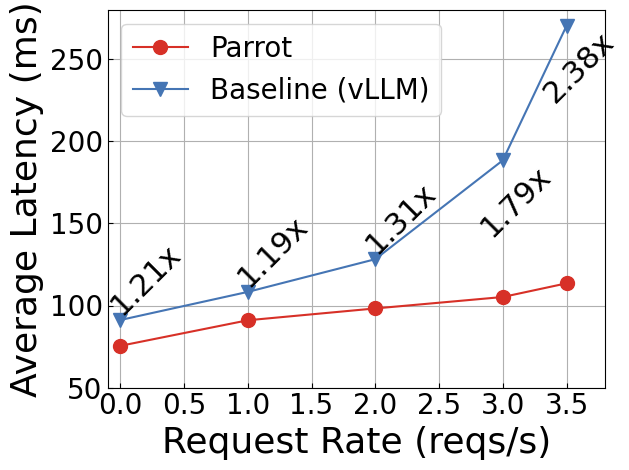

In [36]:
# Organize the data
data = {
    "parrot": parrot,
    "vllm": vllm,
}

names = {
    "parrot": "Parrot",
    "vllm": "Baseline (vLLM)",
}

statistics = {ol: {s: [] for s in systems} for ol in request_rates}

for system, system_data in data.items():
    for key, value in system_data.items():
        request_rate = key[1]
        statistics[request_rate][system].append(value)

# Calculate statistics
averages = {ol: {s: np.mean(values) for s, values in ol_data.items()} for ol, ol_data in statistics.items()}
averages['0'] = {'parrot': 75.42657, 'vllm': 91.15404, 'hf': 122.16704999999999}

# Generate the chart
x = np.arange(len(request_rates))
width = 0.25

fig, ax = plt.subplots()


plt.grid(True)

for i, system in enumerate(systems):
    avg = [averages[ol][system] for ol in request_rates]
    xs = [0,1,2,3,3.5]
    rects = ax.plot(xs, avg, marker=symbols[i], color = colors[i], label=names[system], markersize=10)
    
#     rects = ax.bar(x - width/2 + i*width, avg, width,  hatch = hatches[i], color = colors[i], label=names[system],zorder=3) # hatches
    
    # Add speedup values
    if system != 'parrot':
        speedup_values = [averages[ol][system]/averages[ol]['parrot'] for ol in request_rates]
        print(speedup_values)
        for _, speedup in enumerate(speedup_values):
            height = averages[request_rates[_]][system]
            print(height)
            x_diff = 0.1 if _ >= 3 else 0.2
            h_diff = -50 if _ >=3 else 0
            ax.text(xs[_] + x_diff, height + h_diff,
                    '{:.2f}x'.format(speedup),
                    ha='center', va='bottom', rotation=45,
                    fontsize=22)
            
plt.legend(loc='upper left', prop = { "size": 20 },)
ax.tick_params(axis='y', labelsize=20, direction='in')
ax.tick_params(axis='x', labelsize=20, direction='in')
ax.set_xlabel('Request Rate (reqs/s)', fontsize=26)
ax.set_ylabel('Average Latency (ms)', fontsize=26)
# ax.set_xticks([_+0.1 for _ in x])
# ax.set_xticklabels(request_rates)
plt.ylim([50,280])
plt.xlim([-0.1,3.8])
ax.set_xticks([_*0.5 for _ in range(0,8)])

fig.tight_layout()

plt.savefig('chain-bkg.pdf')

In [31]:
for ol in output_lengths:
    print(ol)
    print(averages[ol]['hf']/averages[ol]['parrot'])
    print(averages[ol]['vllm']/averages[ol]['parrot'])

NameError: name 'output_lengths' is not defined